In [ ]:
!kaggle competitions download new-york-city-taxi-fare-prediction

new-york-city-taxi-fare-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
!unzip new-york-city-taxi-fare-prediction.zip
!unzip train.csv.zip

Archive:  new-york-city-taxi-fare-prediction.zip
replace GCP-Coupons-Instructions.rtf? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.


In [ ]:
import os

def convert_bytes(file_path, unit= None):
    size = os.path.getsize(file_path)
    if unit == 'KB':
        return print('File size: ' + str(round(size/1024, 3)) + 'Kilobytes')
    elif unit=='MB':
        return print('File size: ' + str(round(size/(1024 * 1024), 3)) + 'Megabytes')
    elif unit=='GB':
        return print('File size: ' + str(round(size/(1024 * 1024 * 1024), 3)) + 'Gigabytes')
    else:
        print('File size: ' + str(size) + 'bytes')
        
file_path = 'train.csv'
convert_bytes(file_path)
convert_bytes(file_path, 'GB')

File size: 5697178298bytes
File size: 5.306Gigabytes


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def skip_logic(index, skip_num):
    if index%skip_num == 0:
        return False
    return True

train = pd.read_csv('./train.csv')
print(train.shape)
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

(55423856, 8)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [ ]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
print('Min Fare of Train' , train['fare_amount'].min())
print('Max Fare of Train' , train['fare_amount'].max())

Min Fare of Train -300.0
Max Fare of Train 93963.36


In [ ]:
#counter를 사용해서 결측치를 확인하는 것은 처음 봤음
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 55421402, True: 2454})

In [ ]:
train = train.drop(train[train['fare_amount']<0].index, axis = 0).reset_index(drop = True)
Counter(train['fare_amount']<0)

Counter({False: 55421402})

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542140e+07,5.542140e+07,5.542140e+07,5.542103e+07,5.542103e+07,5.542140e+07
mean,1.134600e+01,-7.250988e+01,3.991990e+01,-7.251142e+01,3.992080e+01,1.685369e+00
std,2.071046e+01,1.284844e+01,9.642271e+00,1.278171e+01,9.633250e+00,1.327656e+00
min,0.000000e+00,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [ ]:
# IQR 이상치 제거는 아직 해보지 않음
# 책으로 한번 따라가보고 이후에 다시 시도할 예정
q75 = train['fare_amount'].quantile(.75)
q25 = train['fare_amount'].quantile(.25)
IQR = q75 - q25
print(q75 + 1.5 * IQR, q25 - 1.5 * IQR)

22.25 -3.75


In [ ]:
# 층화추출로 시각화를 용이하게 시도
train['passenger_count'].unique()

array([  1,   2,   3,   6,   5,   4,   0, 208,   9, 129,   7,  51,  49,
         8,  34])

In [ ]:
# 택시에 6명 이상의 승객이 있는 것은 결측치로 보이기에 제거함
train = train.drop(train[train['passenger_count']>6].index, axis=0).reset_index(drop = True)
train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4, 0])

In [ ]:
# 승객이 0명인 경우는 데이터가 필요없기 때문에 제거함
train = train.drop(train[train['passenger_count']==0].index, axis=0).reset_index(drop = True)
train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4])

In [ ]:
train['passenger_count'].value_counts(normalize = True)

1    0.694168
2    0.148026
5    0.071146
3    0.044047
4    0.021345
6    0.021268
Name: passenger_count, dtype: float64

In [ ]:
#층화 추출 이해를 위한 실습 코드
from sklearn.model_selection import StratifiedShuffleSplit

sample = pd.DataFrame({'group' : np.repeat(['A','B','C'], (60,40,20)), 'smaple_value' : np.random.randn(120)})
split = StratifiedShuffleSplit(n_splits=1, test_size=0.7, random_state=102)

for train_index, test_index in split.split(sample, sample['group']):
    strata_train_set = sample.loc[train_index]
    test_set = sample.loc[test_index]

print(sample['group'].value_counts(normalize=True))
print(sample.shape)
print(strata_train_set['group'].value_counts(normalize = True))
print(strata_train_set.shape)


A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(120, 2)
A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(36, 2)


In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.001, random_state=120)

for large_index, sample_index in split.split(train, train['passenger_count']):
    large_df = train.loc[large_index]
    sample_df = train.loc[sample_index]
    
print('train:\n', train['passenger_count'].value_counts(normalize=True), train.shape)
print('sample:\n', sample_df['passenger_count'].value_counts(normalize=True), sample_df.shape)

train:
 1    0.694168
2    0.148026
5    0.071146
3    0.044047
4    0.021345
6    0.021268
Name: passenger_count, dtype: float64 (55225871, 8)
sample:
 1    0.694166
2    0.148028
5    0.071144
3    0.044037
4    0.021349
6    0.021276
Name: passenger_count, dtype: float64 (55226, 8)


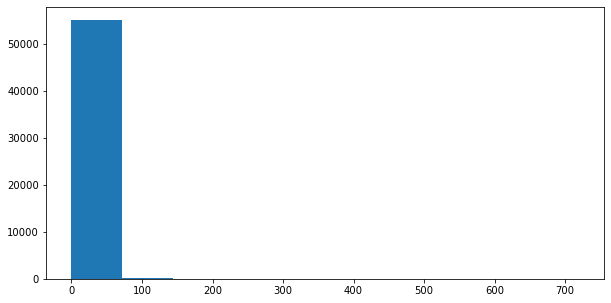

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(sample_df['fare_amount'])
plt.show()

In [ ]:
cond1 = train['pickup_latitude'] > 90
cond2 = train['pickup_latitude'] < -90
cond3 = train['pickup_longitude'] > 180
cond4 = train['pickup_longitude'] < -180
cond5 = train['dropoff_latitude'] > 90
cond6 = train['dropoff_latitude'] < -90
cond7 = train['dropoff_longitude'] > 180
cond8 = train['dropoff_longitude'] < -180

train = train.drop(train[cond1&cond2].index, axis=0).reset_index(drop = True)
train = train.drop(train[cond3&cond4].index, axis=0).reset_index(drop = True)
train = train.drop(train[cond5&cond6].index, axis=0).reset_index(drop = True)
train = train.drop(train[cond7&cond8].index, axis=0).reset_index(drop = True)

train.shape

(55225871, 8)

In [37]:
#key 와 pickup_datetime 두개의 피처를 정리하지 않아서 데이터의 자료형을 확인함
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55225871 entries, 0 to 55225870
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [38]:
train.iloc[:3, 0]

0     2009-06-15 17:26:21.0000001
1     2010-01-05 16:52:16.0000002
2    2011-08-18 00:35:00.00000049
Name: key, dtype: object

In [39]:
train.iloc[:3, 2]

0    2009-06-15 17:26:21 UTC
1    2010-01-05 16:52:16 UTC
2    2011-08-18 00:35:00 UTC
Name: pickup_datetime, dtype: object